# Verifying Lables and Bouding Boxes of the Dataset

### Checking the number of images and labels

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
images_location = "Concealed_Weapon_Detection_Dataset/train/images"
labels_location = "Concealed_Weapon_Detection_Dataset/train/labels"

In [3]:
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_location) if f.endswith('.jpg')}
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_location) if f.endswith('.txt')}

In [4]:
missing_labels = image_files - label_files
missing_images = label_files - image_files

In [5]:
print("Images without labels:", missing_labels)
print("Labels without images:", missing_images)

Images without labels: set()
Labels without images: set()


#### Above output confirms that every image has a coresponding label file and vice versa.

### Verifying the bounding boxes

#### Checking the number of classes in the dataset

In [15]:
def count_classes(label_dir):
    class_ids = set()

    for filename in os.listdir(label_dir):
        if filename.endswith('.txt'):
            with open(os.path.join(label_dir, filename), 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 1:
                        try:
                            class_id = int(parts[0])
                            class_ids.add(class_id)
                        except ValueError:
                            print(f"[ERROR] Invalid class ID in {filename}: {line.strip()}")

    print(f"Total unique classes: {len(class_ids)}")
    print(f"Class IDs found: {sorted(class_ids)}")

In [16]:
count_classes('Concealed_Weapon_Detection_Dataset/train/labels')

Total unique classes: 2
Class IDs found: [0, 1]


In [17]:
def verify_labels(labels_location, classes):
    import glob

    for label_file in glob.glob(os.path.join(labels_location, '*.txt')):
        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"Invalid format in {label_file}: {line.strip()}")
                    continue

                class_id, x, y, w, h = parts
                try:
                    class_id = int(class_id)
                    coords = list(map(float, (x, y, w, h)))
                    if not (0 <= class_id < classes):
                        print(f"Invalid class_id in {label_file}: {class_id}")
                    if not all(0 <= val <= 1 for val in coords):
                        print(f"Out-of-bound bbox in {label_file}: {coords}")
                except ValueError:
                    print(f"Non-numeric value in {label_file}: {line.strip()}")

In [18]:
verify_labels('train/labels', classes=2)

In [22]:
import cv2
import matplotlib.pyplot as plt

def show_image_with_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * w)
            y1 = int((y_center - height / 2) * h)
            x2 = int((x_center + width / 2) * w)
            y2 = int((y_center + height / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

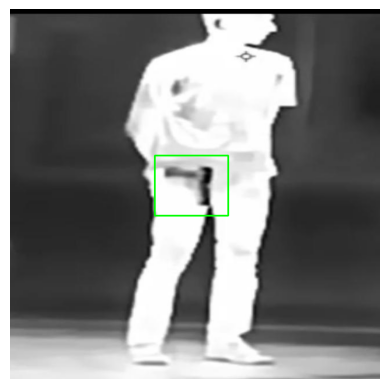

In [23]:
show_image_with_boxes('Concealed_Weapon_Detection_Dataset/train/images/1_png.rf.7974c4ea5c6a55c99923f105eb23d719.jpg', 'Concealed_Weapon_Detection_Dataset/train/labels/1_png.rf.7974c4ea5c6a55c99923f105eb23d719.txt')

#### Above output confirms and verifies the labels present in the dataset are valid and can be used in detection where the objects are hidden.